# PySentimiento

By Alberto Valdés

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

### 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

### 2. Using classifier

In [4]:
analyzer = create_analyzer(task = "sentiment", lang = "es")

In [5]:
def predict_sentiment(analyzer, texto):

    output = analyzer.predict(texto)

    prob_pos = output.probas['POS']
    prob_neu = output.probas['NEU']
    prob_neg = output.probas['NEG']

    return prob_pos

### 3. Read Data

In [6]:
df = pd.read_csv('IMDB Dataset SPANISH.csv')

In [7]:
df = df[['review_es', 'sentimiento']]

In [8]:
df = df.rename(columns = {'review_es': 'comentario'})

In [9]:
df_train, df_val = train_test_split(df, test_size = 0.40, random_state = 42)

In [10]:
df_val, df_test = train_test_split(df_val, test_size = 0.50, random_state = 42)

In [11]:
df_train.shape

(30000, 2)

In [12]:
df_val.shape

(10000, 2)

In [13]:
df_test.shape

(10000, 2)

### 4. Inference

In [14]:
df_train['prob'] = df_train['comentario'].map(lambda x: predict_sentiment(analyzer, x))

In [15]:
df_val['prob'] = df_val['comentario'].map(lambda x: predict_sentiment(analyzer, x))

In [16]:
df_test['prob'] = df_test['comentario'].map(lambda x: predict_sentiment(analyzer, x))

### 5. Performance

In [17]:
df_train['y'] = (df_train['sentimiento'] == 'positivo')*1
df_val['y'] = (df_val['sentimiento'] == 'positivo')*1
df_test['y'] = (df_test['sentimiento'] == 'positivo')*1

In [18]:
all_umbral = []
all_precision = []
all_recall = []
all_f1 = []

for t in range(1, 99 + 1):

    umbral = t/100

    df_train['y_pred'] = (df_train['prob'] >= umbral)*1

    precision_score_part = precision_score(df_train['y'], df_train['y_pred'], average = 'macro')
    recall_score_part = recall_score(df_train['y'], df_train['y_pred'], average = 'macro')
    f1_score_part = f1_score(df_train['y'], df_train['y_pred'], average = 'macro')

    all_umbral.append(umbral)

    all_precision.append(precision_score_part)
    all_recall.append(recall_score_part)
    all_f1.append(f1_score_part)

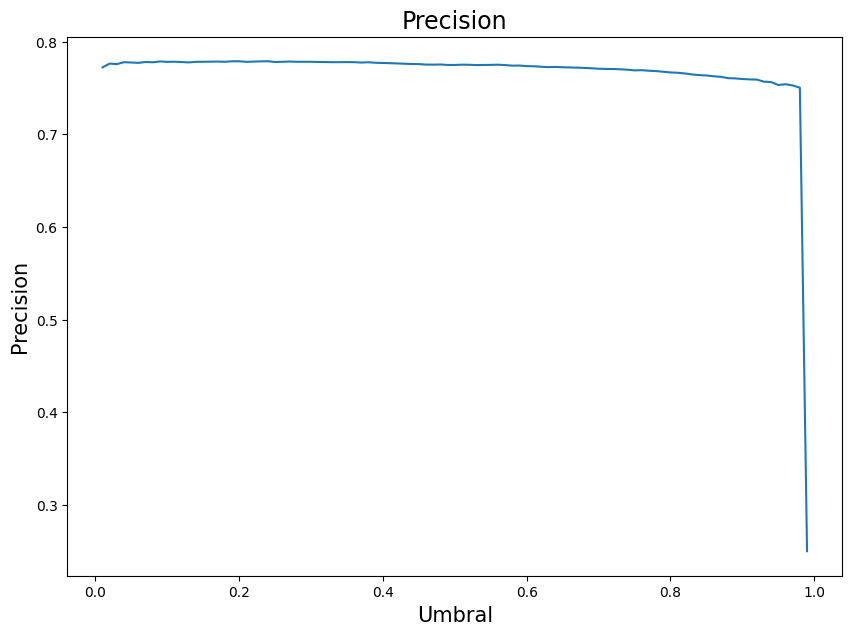

In [19]:
plt.figure(figsize = (10, 7))

plt.plot(all_umbral, all_precision)

plt.title('Precision', fontsize = 17)

plt.ylabel('Precision', fontsize = 15)
plt.xlabel('Umbral', fontsize = 15)

plt.show()

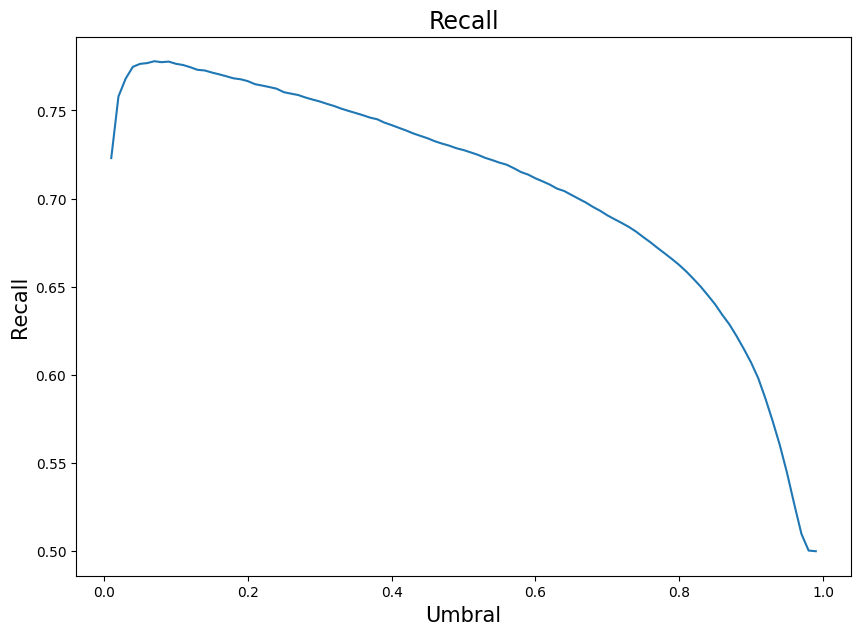

In [20]:
plt.figure(figsize = (10, 7))

plt.plot(all_umbral, all_recall)

plt.title('Recall', fontsize = 17)

plt.ylabel('Recall', fontsize = 15)
plt.xlabel('Umbral', fontsize = 15)

plt.show()

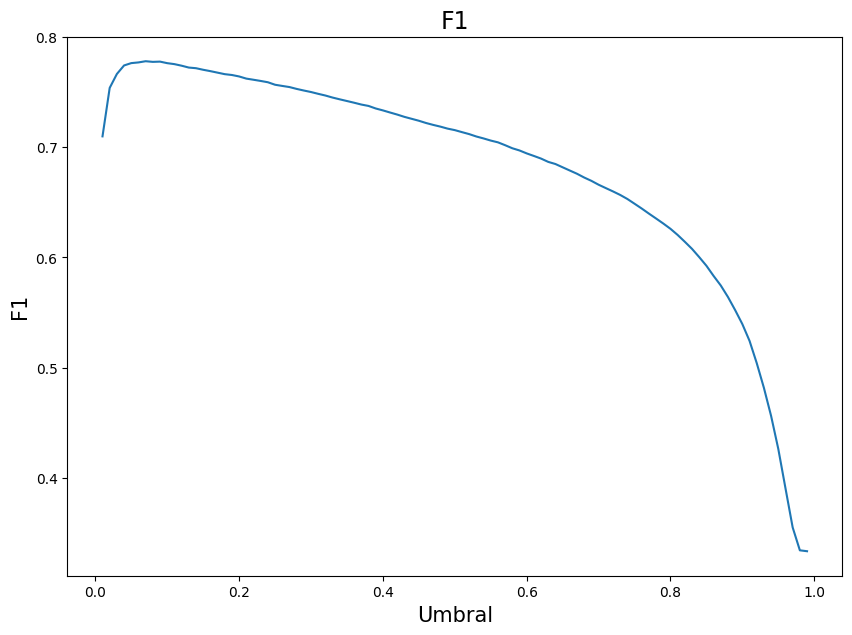

In [21]:
plt.figure(figsize = (10, 7))

plt.plot(all_umbral, all_f1)

plt.title('F1', fontsize = 17)

plt.ylabel('F1', fontsize = 15)
plt.xlabel('Umbral', fontsize = 15)

plt.show()

In [22]:
umbral_opt = all_umbral[all_f1.index(max(all_f1))]

In [23]:
umbral_opt

0.07

In [24]:
df_train['y_pred'] = (df_train['prob'] >= umbral_opt)*1
df_val['y_pred'] = (df_val['prob'] >= umbral_opt)*1
df_test['y_pred'] = (df_test['prob'] >= umbral_opt)*1

**a. Train**

In [25]:
round(precision_score(df_train['y'], df_train['y_pred'], average = 'macro')*100, 2)

77.79

In [26]:
round(recall_score(df_train['y'], df_train['y_pred'], average = 'macro')*100, 2)

77.79

In [27]:
round(f1_score(df_train['y'], df_train['y_pred'], average = 'macro')*100, 2)

77.79

**b. Val**

In [28]:
round(precision_score(df_val['y'], df_val['y_pred'], average = 'macro')*100, 2)

77.11

In [29]:
round(recall_score(df_val['y'], df_val['y_pred'], average = 'macro')*100, 2)

77.11

In [30]:
round(f1_score(df_val['y'], df_val['y_pred'], average = 'macro')*100, 2)

77.11

**c. Test**

In [31]:
round(precision_score(df_test['y'], df_test['y_pred'], average = 'macro')*100, 2)

78.21

In [32]:
round(recall_score(df_test['y'], df_test['y_pred'], average = 'macro')*100, 2)

78.21

In [33]:
round(f1_score(df_test['y'], df_test['y_pred'], average = 'macro')*100, 2)

78.21